<a href="https://colab.research.google.com/github/Guneshwar24/ACIT4610-Evolutionary-Algo/blob/main/Particle_Swarm_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PARTICLE SWARM OPTIMISATION

Enter the number of queens: 8
Enter the initial positions for 8 queens (comma-separated, e.g. 0,1,2,...): 0,1,2,3,4,5,6,7


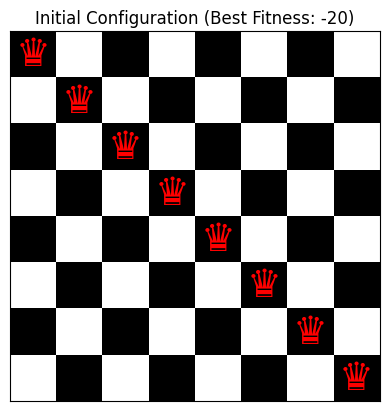

Generation 1 - Best Fitness: 7
Generation 2 - Best Fitness: 7
Generation 3 - Best Fitness: 7
Generation 4 - Best Fitness: 7
Generation 5 - Best Fitness: 8
Solution found at generation 5


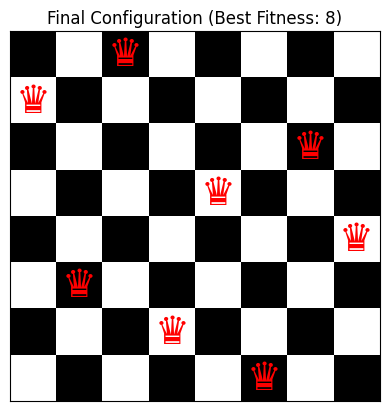

No queens clash in the final configuration.


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Fitness function for the N-Queens Problem
def fitness(solution):
    clashes = 0
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            if solution[i] == solution[j] or abs(solution[i] - solution[j]) == j - i:
                clashes += 1
    return len(solution) - clashes

# Function to check if queens are clashing
def queens_clash(solution):
    return fitness(solution) < len(solution)

# Mutation function to swap two positions
def mutate(position):
    idx1, idx2 = random.sample(range(len(position)), 2)
    position[idx1], position[idx2] = position[idx2], position[idx1]
    return position

# Particle class representing a single solution
class Particle:
    def __init__(self, initial_positions=None):
        self.position = initial_positions if initial_positions else random.sample(range(N), N)
        self.best_position = self.position.copy()
        self.best_fitness = fitness(self.position)
        self.stagnation = 0

    def move(self, gbest_position):
        new_position = self.position.copy()
        for i in range(len(new_position)):
            if random.random() < 0.5:
                swap_index = new_position.index(gbest_position[i])
                new_position[i], new_position[swap_index] = new_position[swap_index], new_position[i]
        if random.random() < mutation_rate:
            new_position = mutate(new_position)
        self.position = new_position

# Plot function
def plot_solution(solution, best_fitness, title="N-Queens Solution"):
    if solution is None:
        print("No solution found, so no plot will be generated.")
        return
    N = len(solution)
    board = np.zeros((N, N), dtype=int)
    board[::2, ::2] = 1
    board[1::2, 1::2] = 1
    fig, ax = plt.subplots()
    ax.imshow(board, cmap='binary')
    queen_symbol = u'\u265B'  # Unicode character for queen
    for i, j in enumerate(solution):
        ax.text(j, i, queen_symbol, ha='center', va='center', color='red', fontsize=28)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(f"{title} (Best Fitness: {best_fitness})")
    plt.show()

# Main execution
N = int(input("Enter the number of queens: "))
if N < 4:
    print("The n-Queens problem is not valid for N less than 4.")
else:
    initial_positions = [int(pos) if pos.strip().isdigit() else None for pos in input(f"Enter the initial positions for {N} queens (comma-separated, e.g. 0,1,2,...): ").split(",")]
    if not all(pos is not None and 0 <= pos < N for pos in initial_positions):
        print("Invalid initial positions. Please enter numbers within the correct range.")
    else:
        plot_solution(initial_positions, fitness(initial_positions), "Initial Configuration")

        # PSO parameters
        num_particles = 500
        num_iterations = 2000
        reset_threshold = 200
        mutation_rate = 0.7

        # Initialize particles
        particles = [Particle(initial_positions) for _ in range(num_particles)]
        gbest_position = max(particles, key=lambda p: p.best_fitness).position
        gbest_fitness = fitness(gbest_position)

        # PSO main loop
        for iteration in range(num_iterations):
            for particle in particles:
                particle.move(gbest_position)
                p_fitness = fitness(particle.position)
                if p_fitness > particle.best_fitness:
                    particle.best_position = particle.position.copy()
                    particle.best_fitness = p_fitness
                    particle.stagnation = 0
                else:
                    particle.stagnation += 1
                    if particle.stagnation >= reset_threshold:
                        particle.position = random.sample(range(N), N)
                        particle.stagnation = 0
                if p_fitness > gbest_fitness:
                    gbest_position = particle.position.copy()
                    gbest_fitness = p_fitness
            # Print the best fitness at each generation
            print(f"Generation {iteration + 1} - Best Fitness: {gbest_fitness}")

            if gbest_fitness == N:
                print(f"Solution found at generation {iteration + 1}")
                break

        plot_solution(gbest_position, gbest_fitness, "Final Configuration")

        if queens_clash(gbest_position):
            print("The queens clash in the final configuration.")
        else:
            print("No queens clash in the final configuration.")